# <b>1 <span style='color:#0000FF'>|</span> Introduction</b>
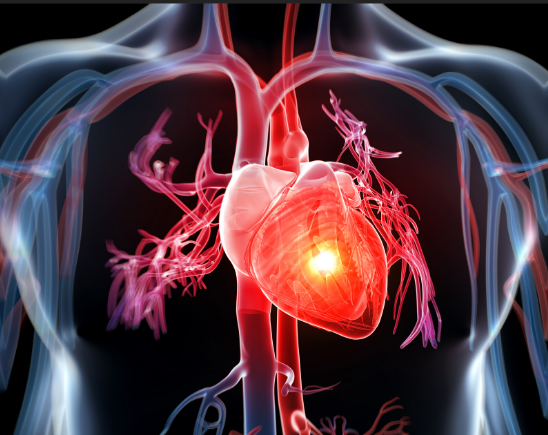

## <span style="color: blue;">What topic does the dataset cover?</span> 

**According to the CDC, heart disease is one of the leading causes of death for people of most races in the US (African Americans, American Indians and Alaska Natives, and white people). About half of all Americans (47%) have at least 1 of 3 key risk factors for heart disease: high blood pressure, high cholesterol, and smoking. Other key indicator include diabetic status, obesity (high BMI), not getting enough physical activity or drinking too much alcohol. Detecting and preventing the factors that have the greatest impact on heart disease is very important in healthcare. Computational developments, in turn, allow the application of machine learning methods to detect "patterns" from the data that can predict a patient's condition.**

## <span style="color: blue;">A bout Heart Attack</span>
**A heart attack (Cardiovascular diseases) occurs when the flow of blood to the heart muscle suddenly becomes blocked. From WHO statistics every year 17.9 million dying from heart attack. The medical study says that human life style is the main reason behind this heart problem. Apart from this there are many key factors which warns that the person may/maynot getting chance of heart attack.**

> <img style="float: centre;" src="https://img.lovepik.com/photo/50074/6189.jpg_wh860.jpg" width="600px"/>


## <span style="color: blue;">Explanation of the variables of the dataset</span> 


| Column     | Detail |
| :----------- | :----------- |
| **HeartDisease**|Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI) |
| **BMI**   |Body Mass Index (BMI) |
| **Smoking**  | Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes]|
| **AlcoholDrinking**  | Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week)|
| **Stroke**  |(Ever told) (you had) a stroke? |
| **PhysicalHealth**  |Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good?|
| **MentalHealth**  |Thinking about your mental health, for how many days during the past 30 days was your mental health not good?  |
| **DiffWalking**  |Do you have serious difficulty walking or climbing stairs? |
| **Sex**  |Are you male or female?  |
| **AgeCategory**  |Fourteen-level age category  |
| **Race**  |Imputed race/ethnicity value  |
| **Diabetic**  |(Ever told) (you had) diabetes?  |
| **PhysicalActivity**  |Adults who reported doing physical activity or exercise during the past 30 days other than their regular job  |
| **GenHealth**  |Would you say that in general your health is...  |
| **SleepTime**  |On average, how many hours of sleep do you get in a 24-hour period?  |
| **Asthma**  |(Ever told) (you had) asthma?  |
| **KidneyDisease**  |Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease? |
| **SkinCancer**  |(Ever told) (you had) skin cancer?  |
    

# <b>2 <span style='color:#0000FF'>|</span> Importing libraries</b>

In [61]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from datasist.structdata import detect_outliers

# data modeling 
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay ,accuracy_score, precision_score, recall_score, f1_score, fbeta_score, classification_report
from sklearn.model_selection import cross_validate
import joblib
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
sns.set(rc={'figure.figsize': [10, 6]}, font_scale=1.3)


# <b>3 <span style='color:#0000FF'>|</span> Reading the dataset</b>

In [2]:
def read_data(path) :
    df = pd.read_csv(path)
    return df

In [3]:
df= read_data('heart_disease.csv')
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

#### The output shows that we have around 319795 entries with 18  columns. No null values, and we have 4 numeric features, and 14 categorial features. .

In [5]:
df.describe().T.style.set_properties(**{'background-color': '#FFFF99','color': 'black','border-color': 'white'})

,count,mean,std,min,25%,50%,75%,max
BMI,319795.000000,28.325399,6.356100,12.020000,24.030000,27.340000,31.420000,94.850000
PhysicalHealth,319795.000000,3.371710,7.950850,0.000000,0.000000,0.000000,2.000000,30.000000
MentalHealth,319795.000000,3.898366,7.955235,0.000000,0.000000,0.000000,3.000000,30.000000
SleepTime,319795.000000,7.097075,1.436007,1.000000,6.000000,7.000000,8.000000,24.000000


- You may notice that there is an extremely high value of **BMI** and **SleepTime**.  
- The describe function only shows the **'float64'** dtype columns as shown in the info function. The function below will show the rest.

In [6]:
df.describe(include='O').T.style.set_properties(**{'background-color': '#FFFF99','color': 'black','border-color': 'white'})

,count,unique,top,freq
HeartDisease,319795,2,No,292422
Smoking,319795,2,No,187887
AlcoholDrinking,319795,2,No,298018
Stroke,319795,2,No,307726
DiffWalking,319795,2,No,275385
Sex,319795,2,Female,167805
AgeCategory,319795,13,65-69,34151
Race,319795,6,White,245212
Diabetic,319795,4,No,269653
PhysicalActivity,319795,2,Yes,247957


#### We have some attributes that have more than two unique values, we'll use OneHotEncoder in the preprocessing step later.

In [7]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

#### There is no NULL values

In [8]:
df.duplicated().sum()

18078

#### There is 18078 dublicated values , I will drop them before start 

In [9]:
df.drop_duplicates(inplace=True)

In [13]:
df.shape

(301717, 18)

# <b>4<span style='color:#0000FF'>|</span> Pandas Profiling </b>

### <span style="color: blue;">Generates profile reports from a pandas DataFrame.</span>
 - **for more information about pandas profile report check this** 
 **[Github | pandas profiling](https://github.com/ydataai/pandas-profiling)**

In [10]:
profile=ProfileReport(df, minimal=True,explorative=True)
profile.to_file('heart_disease.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
profile

# <b>5 <span style='color:#0000FF'>|</span> Exploratory Data Analysis</b>

<div style="color:yellow;display:fill;border-radius:8px;
            background-color:#0000FF;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px
;color:white;"><b>5.1 | Target Feature ' Heart Disease ' </b></p>
</div>. 

HeartDisease
No              274456
Yes              27261
dtype: int64
__________________________________________________
HeartDisease
No              0.909647
Yes             0.090353
dtype: float64


<AxesSubplot:>

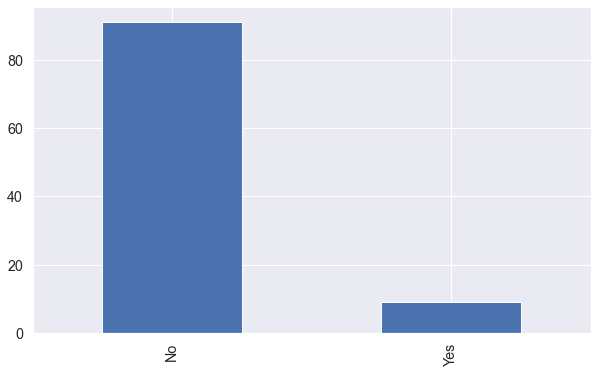

In [15]:
print(df[['HeartDisease']].value_counts())
print('_'*50)
print(df[['HeartDisease']].value_counts(normalize=True))
df['HeartDisease'].value_counts(normalize=True).plot(kind='bar')

**Most people in this dataset are reported to not have had a heart condition (coronary heart disease (CHD) or myocardial infarction (MI) in specific)**

<div style="color:yellow;display:fill;border-radius:8px;
            background-color:#0000FF;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px
;color:white;"><b>5.2 | Numerical Features </b></p>
</div>. 

- **BMI**
- **Physical health**
- **Mental health**
- **Sleep time**

In [16]:
num_cols= ['BMI','PhysicalHealth', 'MentalHealth','SleepTime']

 <div style="color:yellow;display:fill;border-radius:8px;
            background-color:#ffcc00;font-size:180%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px
;color:blue;"><b> 1. BMI  </b></p>
</div>
 
 **Body Mass Index (BMI) is a person’s weight in kilograms (or pounds) divided by the square of height in meters (or feet). A high BMI can indicate high body fatness. BMI screens for weight categories that may lead to health problems, but it does not diagnose the body fatness or health of an individual.**

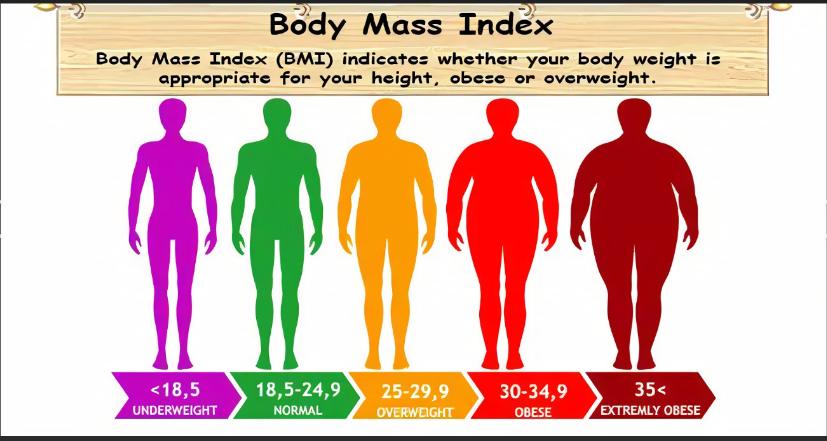

In [17]:
df[['BMI']].describe().T

,count,mean,std,min,25%,50%,75%,max
BMI,301717.0,28.44197,6.468134,12.02,24.03,27.41,31.65,94.85


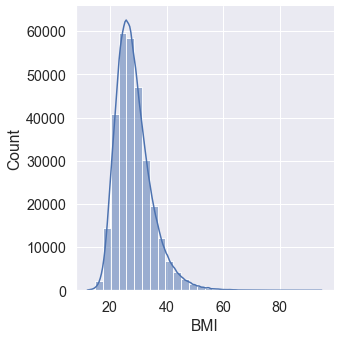

In [18]:
sns.displot(df.BMI,bins=30,kde=True)

#### The distribution of BMI seems somewhat normal, but there seems to be a slight <span style="color:blue;">**right skew**</span>.


<AxesSubplot:xlabel='BMI'>

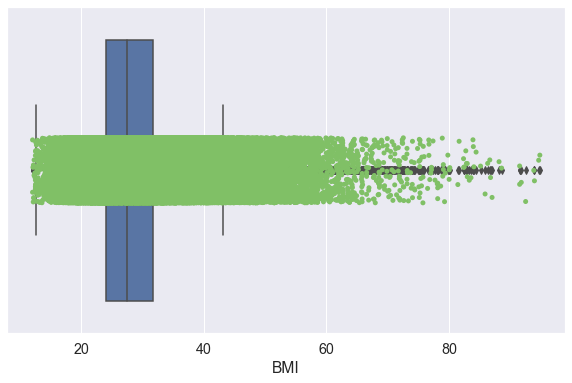

In [21]:
sns.boxplot(df.BMI)
sns.stripplot(df.BMI,palette='summer')

From the visualizations , we find **Outliers**

Using the **'Outlier Formula'**, percentage of outliers (toward the left and right) are computed below.

In [91]:
BMI_75 = np.percentile(df['BMI'],75)
BMI_25 = np.percentile(df['BMI'],25)
BMI_IQR = BMI_75 - BMI_25

#Outlier Check (%)
print(round(df[df['BMI'] > BMI_75 + 1.5 * BMI_IQR]['BMI'].count()/df.shape[0]*100, 2))
print(round(df[df['BMI'] < BMI_25 - 1.5 * BMI_IQR]['BMI'].count()/df.shape[0]*100, 2))

2.94
0.01


<AxesSubplot:xlabel='HeartDisease', ylabel='BMI'>

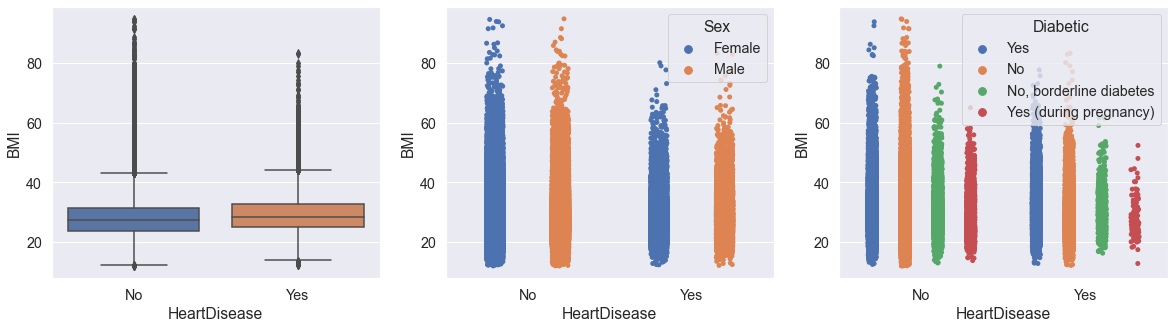

In [22]:
fig, ax = plt.subplots(1,3,figsize = (20,5))
sns.boxplot(data=df,x='HeartDisease',y='BMI',ax=ax[0])
sns.stripplot(data=df,x='HeartDisease',y='BMI',hue='Sex',dodge=True,ax=ax[1])
sns.stripplot(data=df,x='HeartDisease',y='BMI',hue='Diabetic',dodge=True,ax=ax[2])

**The percentage of heart disease is nearly equal between Male and Female.** 

 <div style="color:yellow;display:fill;border-radius:8px;
            background-color:#ffcc00;font-size:180%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px
;color:blue;"><b> 2. Sleep Time  </b></p>
</div>

In [23]:
df[['SleepTime']].describe().T

,count,mean,std,min,25%,50%,75%,max
SleepTime,301717.0,7.084559,1.467122,1.0,6.0,7.0,8.0,24.0


In [28]:
df[df['SleepTime'] > 12]['HeartDisease'].value_counts()

No     831
Yes    168
Name: HeartDisease, dtype: int64

In [29]:
pd.DataFrame(df['SleepTime'].value_counts().sort_index()).style.bar(color='lightpink')

,SleepTime
1.0,551
2.0,788
3.0,1992
4.0,7730
5.0,19101
6.0,64655
7.0,89445
8.0,90202
9.0,15853
10.0,7782


<AxesSubplot:>

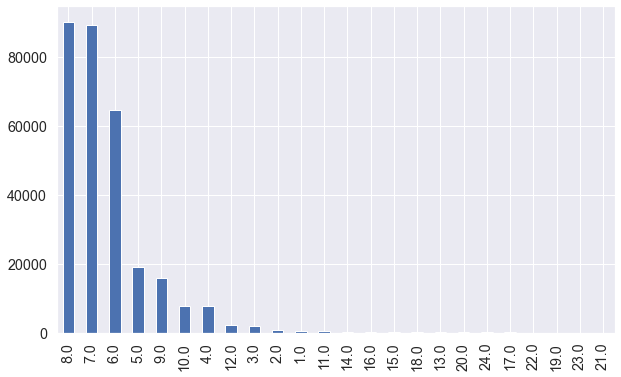

In [30]:
df['SleepTime'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='SleepTime', ylabel='count'>

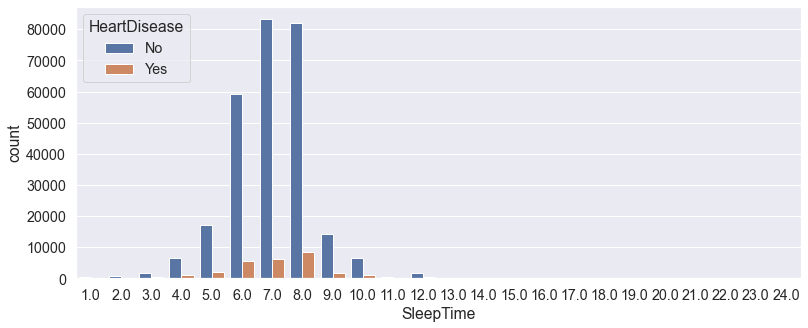

In [31]:
plt.subplots(figsize = (13,5))
sns.countplot(data=df,x='SleepTime',hue='HeartDisease')

<AxesSubplot:xlabel='HeartDisease', ylabel='SleepTime'>

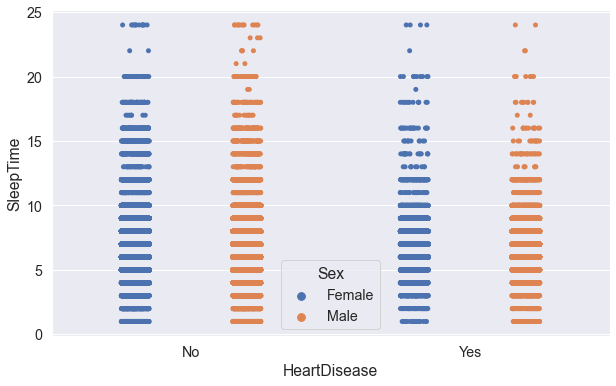

In [97]:
sns.stripplot(data=df,y='SleepTime',x='HeartDisease',hue='Sex',dodge=True)

In [98]:
df[df.SleepTime < 8]['HeartDisease'].value_counts(normalize=True)*100

No     91.618999
Yes     8.381001
Name: HeartDisease, dtype: float64

**7% of people who sleep less than 8 hours have heart disease** 

In [99]:
df[df.SleepTime <12]['HeartDisease'].value_counts(normalize=True)*100

No     91.063401
Yes     8.936599
Name: HeartDisease, dtype: float64

**8.5% of people who sleep more than 12 hours have heart disease**

 <div style="color:yellow;display:fill;border-radius:8px;
            background-color:#ffcc00;font-size:160%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px
;color:blue;"><b> 3. Physical Health | Mental Healthe  </b></p>
</div>

In [32]:
print(df[['PhysicalHealth']].describe().T)
print('_'*50)
print(df[['MentalHealth']].describe().T)

                   count      mean       std  min  25%  50%  75%   max
PhysicalHealth  301717.0  3.572298  8.140656  0.0  0.0  0.0  2.0  30.0
__________________________________________________
                 count      mean       std  min  25%  50%  75%   max
MentalHealth  301717.0  4.121475  8.128288  0.0  0.0  0.0  4.0  30.0


<AxesSubplot:>

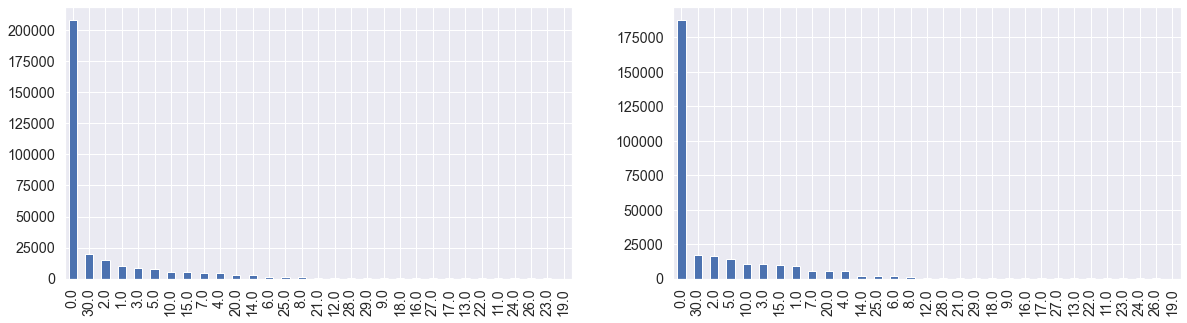

In [34]:
fig,ax=plt.subplots(1,2,figsize=(20,5))
df['PhysicalHealth'].value_counts().plot(kind='bar',ax=ax[0])
df['MentalHealth'].value_counts().plot(kind='bar',ax=ax[1])

In [41]:
df[df['HeartDisease']=='Yes'].groupby('PhysicalHealth')['HeartDisease'].value_counts().head()

PhysicalHealth  HeartDisease
0.0             Yes             14310
1.0             Yes               605
2.0             Yes              1169
3.0             Yes               843
4.0             Yes               494
Name: HeartDisease, dtype: int64

**People who have zero value of physical health are the most heart disease, come next people who have 30 days good physicalhealth**   

<AxesSubplot:xlabel='PhysicalHealth', ylabel='Density'>

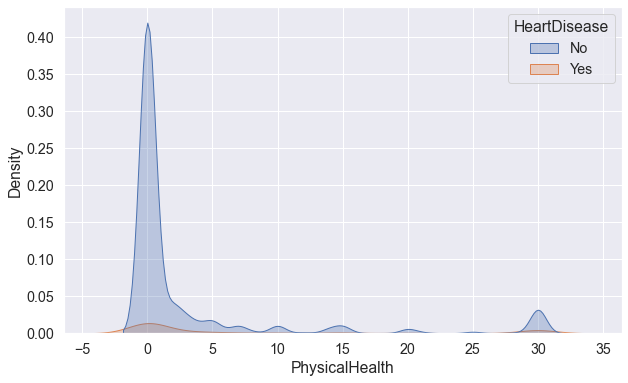

In [103]:
sns.kdeplot(data=df,x='PhysicalHealth',hue='HeartDisease',shade=True,alpha=.3)

In [104]:
df[df['HeartDisease']=='Yes'].groupby('MentalHealth')['HeartDisease'].value_counts().head()

MentalHealth  HeartDisease
0.0           Yes             18103
1.0           Yes               613
2.0           Yes              1041
3.0           Yes               658
4.0           Yes               323
Name: HeartDisease, dtype: int64

<AxesSubplot:xlabel='MentalHealth', ylabel='Density'>

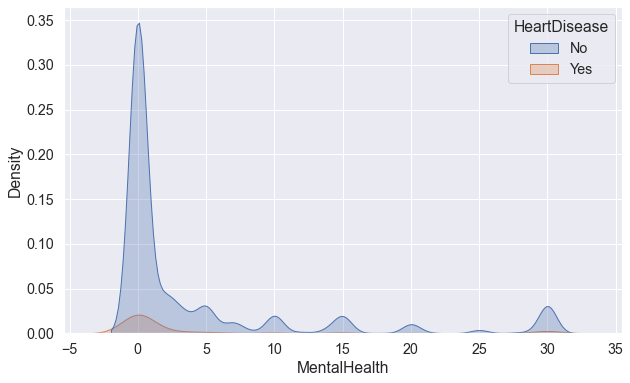

In [105]:
sns.kdeplot(data=df,x='MentalHealth',hue='HeartDisease',shade=True,alpha=.3)

**For both Physical Health and Mental health, we can see a heavy right skew. It also seems that most people answered '0 days' for both, which sounds like they are 'normal'. But compared to other answers like '8 days' or '15 days', many people (in comparison to other answers within the 1-30 range) answered '30 days', which basically sounds like they don't feel good every day.**

  <div style="color:yellow;display:fill;border-radius:8px;
            background-color:#ffcc00;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px
;color:black;"><b> Correlation Matrix   </b></p>
</div>

In [151]:
df.corr()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,AgeCategory,PhysicalActivity,...,SkinCancer,Sex_Male,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy)
HeartDisease,1.000000,0.047260,0.104524,-0.036289,0.194665,0.165235,0.020913,0.196420,0.239259,-0.093597,...,0.090644,0.074435,-0.032841,-0.014517,-0.040680,-0.006076,0.048892,0.013793,0.178917,-0.015508
BMI,0.047260,1.000000,0.015890,-0.043463,0.016314,0.103813,0.056724,0.177388,-0.006069,-0.144441,...,-0.038060,0.024200,-0.081949,0.077074,0.019804,0.009565,-0.041448,0.047106,0.199859,0.006676
Smoking,0.104524,0.015890,1.000000,0.109183,0.058868,0.110270,0.078364,0.115789,0.128259,-0.089864,...,0.030438,0.087514,-0.064314,-0.044215,-0.073012,0.013278,0.083659,0.004426,0.052500,-0.007271
AlcoholDrinking,-0.036289,-0.043463,0.109183,1.000000,-0.022707,-0.023255,0.045421,-0.041135,-0.060761,0.024408,...,-0.008739,0.006824,-0.024323,-0.029654,-0.018975,0.003102,0.040372,-0.010214,-0.063708,-0.005308
Stroke,0.194665,0.016314,0.058868,-0.022707,1.000000,0.132966,0.041324,0.170664,0.141537,-0.074898,...,0.046039,-0.001343,-0.017760,0.022010,-0.028920,0.003676,0.006864,0.009484,0.105108,-0.005574
PhysicalHealth,0.165235,0.103813,0.110270,-0.023255,0.132966,1.000000,0.279657,0.422935,0.114623,-0.224121,...,0.036753,-0.038427,-0.039036,0.005113,-0.011764,0.011739,0.008125,0.017889,0.151242,-0.003011
MentalHealth,0.020913,0.056724,0.078364,0.045421,0.041324,0.279657,1.000000,0.142964,-0.158608,-0.084274,...,-0.040214,-0.098916,-0.027199,0.004008,0.004558,0.026678,-0.011455,0.007045,0.015977,0.016415
DiffWalking,0.196420,0.177388,0.115789,-0.041135,0.170664,0.422935,0.142964,1.000000,0.250407,-0.271748,...,0.060596,-0.067335,-0.042431,0.034050,-0.014040,0.004362,-0.004359,0.028607,0.210911,-0.009166
AgeCategory,0.239259,-0.006069,0.128259,-0.060761,0.141537,0.114623,-0.158608,0.250407,1.000000,-0.125294,...,0.267930,-0.060620,-0.084699,-0.035210,-0.163452,-0.062176,0.196541,0.050038,0.216755,-0.034716
PhysicalActivity,-0.093597,-0.144441,-0.089864,0.024408,-0.074898,-0.224121,-0.084274,-0.271748,-0.125294,1.000000,...,0.004785,0.045309,0.016128,-0.037135,-0.050085,0.006854,0.051485,-0.013302,-0.132946,0.004006


In [44]:
''' Function to plot correlation of features '''
def corrMat(df,id=False):
    
    corr_mat = df.corr().round(2)
    f, ax = plt.subplots(figsize=(20,10))
    mask = np.zeros_like(corr_mat,dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(corr_mat,mask=mask,vmin=-1,vmax=1,center=0, 
                cmap='viridis',square=False,lw=2,annot=True,cbar=False,fmt='.1');plt.show() 

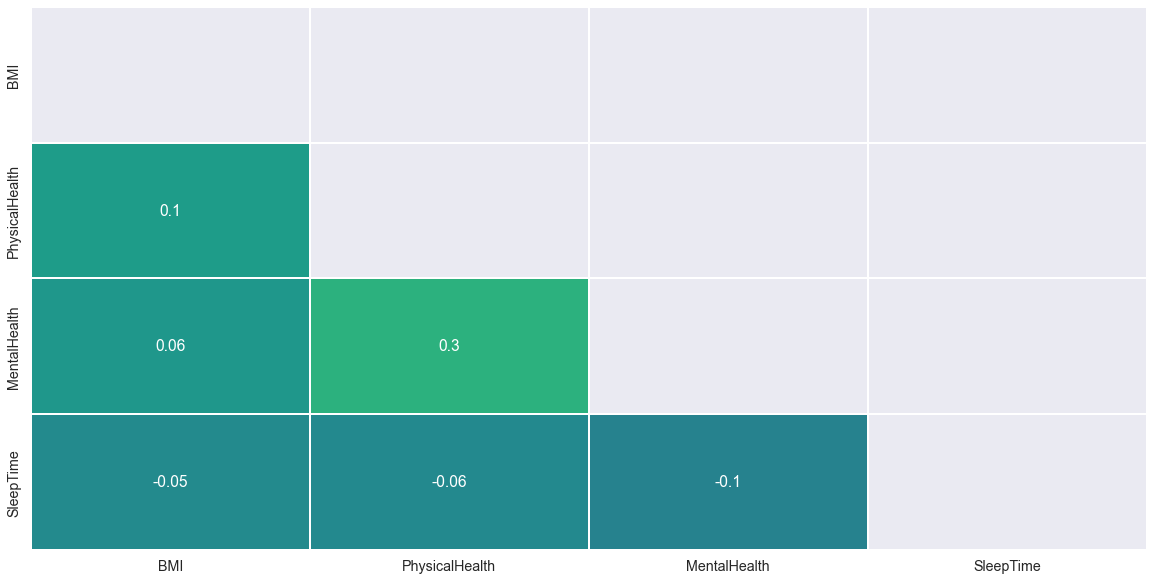

In [45]:
corrMat(df)

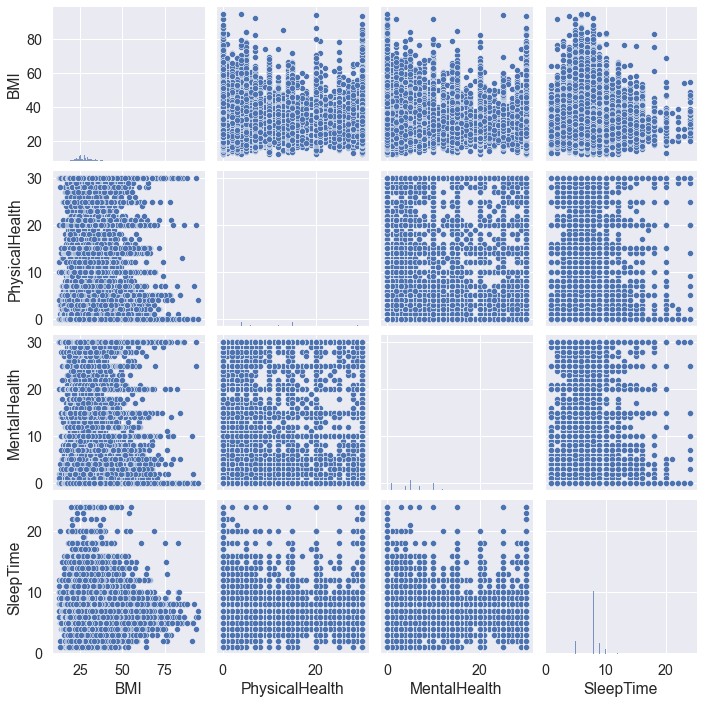

In [46]:
sns.pairplot(df)

<div style="color:yellow;display:fill;border-radius:8px;
            background-color:#0000FF;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px
;color:white;"><b>5.3 | Categorical Features </b></p>
</div>. 

- **Smoking**         
- **AlcoholDrinking**
- **Stroke**
- **DiffWalking**
- **Sex**
- **AgeCategory**
- **Race**
- **Diabetic**
- **PhysicalActivity**
- **GenHealth**
- **Asthma**
- **KidneyDisease**
- **SkinCancer**

In [47]:
cat_cols=['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'AgeCategory','Race',
          'Diabetic', 'PhysicalActivity', 'GenHealth','Asthma', 'KidneyDisease', 'SkinCancer']

  <div style="color:yellow;display:fill;border-radius:8px;
            background-color:#ffcc00;font-size:160%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px
;color:blue;"><b> Yes|No Columns  </b></p>
</div>


In [48]:
Yes_No_Columns=['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'PhysicalActivity', 'Asthma',
                'KidneyDisease', 'SkinCancer']

In [49]:
for col in Yes_No_Columns:
    print(df.groupby(col)['HeartDisease'].value_counts())
    print('_'*50)

Smoking  HeartDisease
No       No              163028
         Yes              11284
Yes      No              111428
         Yes              15977
Name: HeartDisease, dtype: int64
__________________________________________________
AlcoholDrinking  HeartDisease
No               No              254016
                 Yes              26120
Yes              No               20440
                 Yes               1141
Name: HeartDisease, dtype: int64
__________________________________________________
Stroke  HeartDisease
No      No              266781
        Yes              22872
Yes     No                7675
        Yes               4389
Name: HeartDisease, dtype: int64
__________________________________________________
DiffWalking  HeartDisease
No           No              240125
             Yes              17237
Yes          No               34331
             Yes              10024
Name: HeartDisease, dtype: int64
__________________________________________________
PhysicalA

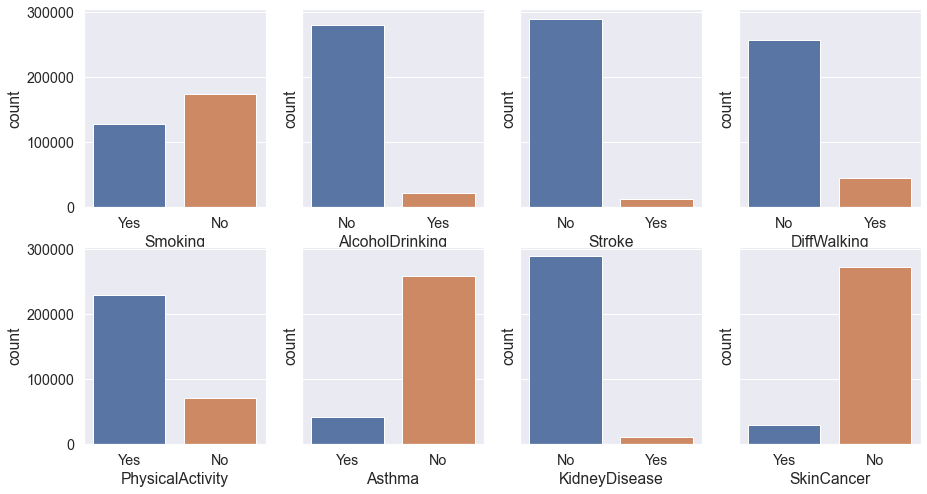

In [50]:
fig, ax = plt.subplots(2,4, sharey = True, figsize = (15,8))

for i,col in enumerate(Yes_No_Columns):
    row_n= int((Yes_No_Columns.index(col) - Yes_No_Columns.index(col) % 4)/4)
    column_n = Yes_No_Columns.index(col) % 4
    sns.countplot(data=df,x=col,ax=ax[row_n,column_n])
        

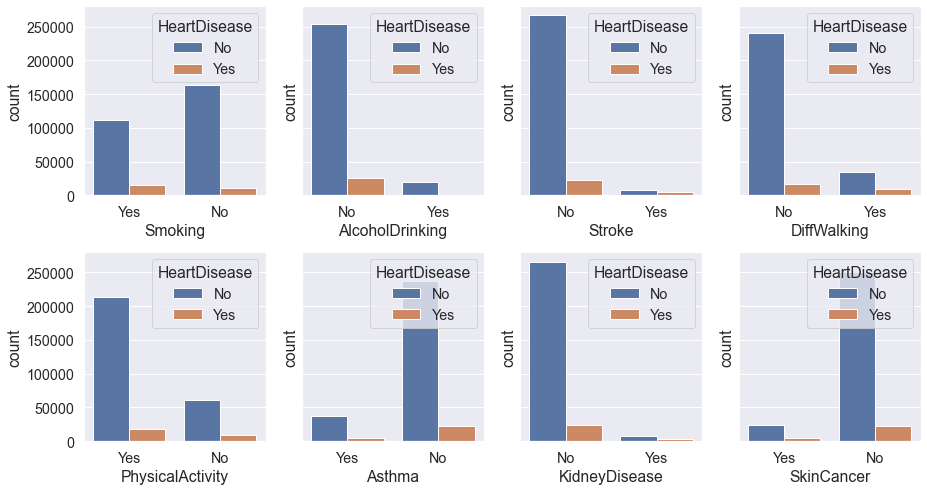

In [51]:
fig, ax = plt.subplots(2,4, sharey = True, figsize = (15,8))
plt.subplots_adjust(hspace = 0.3)

for i,col in enumerate(Yes_No_Columns):
    row_n= int((Yes_No_Columns.index(col) - Yes_No_Columns.index(col) % 4)/4)
    column_n = Yes_No_Columns.index(col) % 4
    sns.countplot(data=df,x=col,hue='HeartDisease',ax=ax[row_n,column_n])
        

**For each of the plot above, we can see the proportions/distribution of Yes/No results to the related questions.**

   <div style="color:yellow;display:fill;border-radius:8px;
            background-color:#ffcc00;font-size:160%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px
;color:blue;"><b> Sex  </b></p>
</div>


Female    159671
Male      142046
Name: Sex, dtype: int64


<AxesSubplot:>

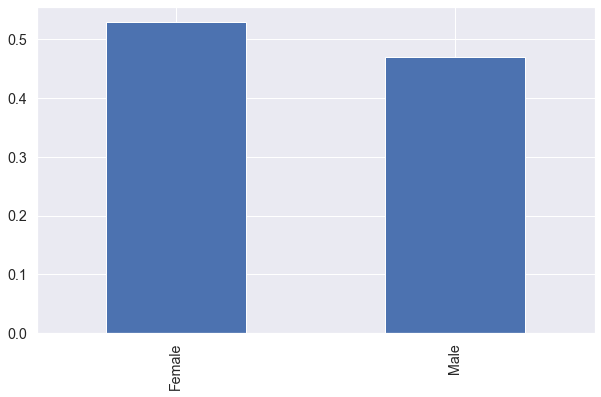

In [52]:
print(df.Sex.value_counts())
df.Sex.value_counts(normalize=True).plot(kind='bar')

Sex     HeartDisease
Female  No              0.929774
        Yes             0.070226
Male    No              0.887023
        Yes             0.112977
Name: HeartDisease, dtype: float64


<AxesSubplot:xlabel='Sex', ylabel='count'>

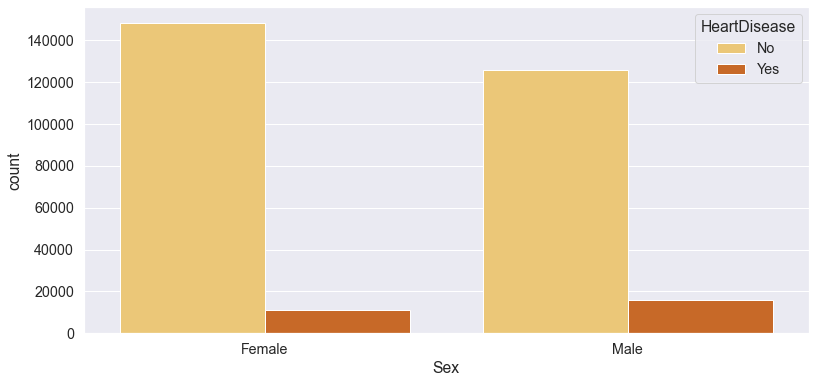

In [53]:
plt.figure(figsize = (13,6))
print(df.groupby('Sex')['HeartDisease'].value_counts(normalize=True))
sns.countplot(x = df['Sex'], hue = 'HeartDisease', data = df, palette = 'YlOrBr')

- **Most cases of heart disease are men.**
- **Most cases that got no heart disease are women**

   <div style="color:yellow;display:fill;border-radius:8px;
            background-color:#ffcc00;font-size:160%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px
;color:blue;"><b> Age Category </b></p>
</div>


In [54]:
pd.DataFrame(df['AgeCategory'].value_counts()).style.bar(color='thistle')

,AgeCategory
65-69,31670
60-64,31219
70-74,29273
55-59,27610
50-54,23736
80 or older,23352
75-79,20713
45-49,20518
18-24,19998
40-44,19837


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, '55-59'),
  Text(1, 0, '80 or older'),
  Text(2, 0, '65-69'),
  Text(3, 0, '75-79'),
  Text(4, 0, '40-44'),
  Text(5, 0, '70-74'),
  Text(6, 0, '60-64'),
  Text(7, 0, '50-54'),
  Text(8, 0, '45-49'),
  Text(9, 0, '18-24'),
  Text(10, 0, '35-39'),
  Text(11, 0, '30-34'),
  Text(12, 0, '25-29')])

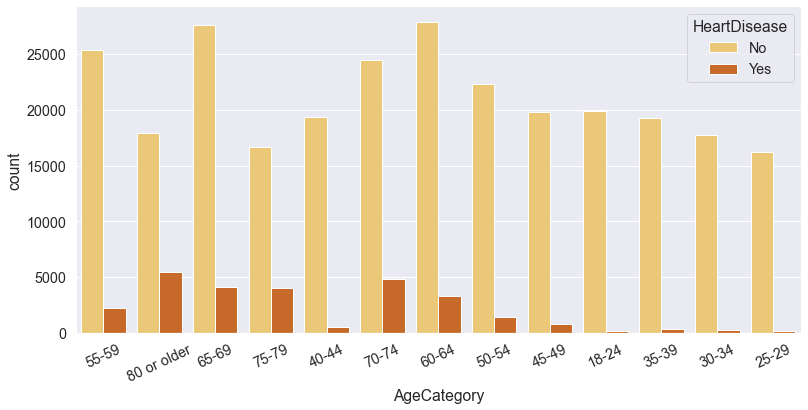

In [55]:
plt.figure(figsize = (13,6))
sns.countplot(x = df['AgeCategory'], hue = 'HeartDisease', data = df, palette = 'YlOrBr')
plt.xticks(rotation=25)

- **We can see that people who are 80 or older are more likely to get HeartDiseases.**

   <div style="color:yellow;display:fill;border-radius:8px;
            background-color:#ffcc00;font-size:160%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px
;color:blue;"><b> Race  </b></p>
</div>



White                             227724
Hispanic                           27107
Black                              22810
Other                              10891
Asian                               7993
American Indian/Alaskan Native      5192
Name: Race, dtype: int64


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'White'),
  Text(1, 0, 'Hispanic'),
  Text(2, 0, 'Black'),
  Text(3, 0, 'Other'),
  Text(4, 0, 'Asian'),
  Text(5, 0, 'American Indian/Alaskan Native')])

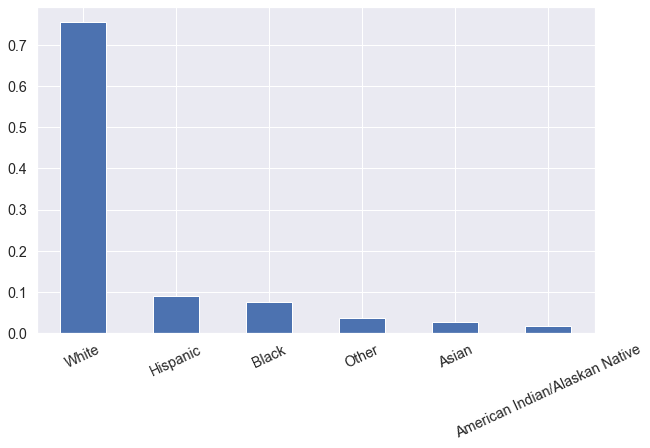

In [118]:
print(df.Race.value_counts())
df.Race.value_counts(normalize=True).plot(kind='bar')
plt.xticks(rotation= 25)

Race                            HeartDisease
American Indian/Alaskan Native  No                4650
                                Yes                542
Asian                           No                7727
                                Yes                266
Black                           No               21081
                                Yes               1729
Hispanic                        No               25664
                                Yes               1443
Other                           No               10005
                                Yes                886
White                           No              205329
                                Yes              22395
Name: HeartDisease, dtype: int64


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'White'),
  Text(1, 0, 'Black'),
  Text(2, 0, 'Asian'),
  Text(3, 0, 'American Indian/Alaskan Native'),
  Text(4, 0, 'Other'),
  Text(5, 0, 'Hispanic')])

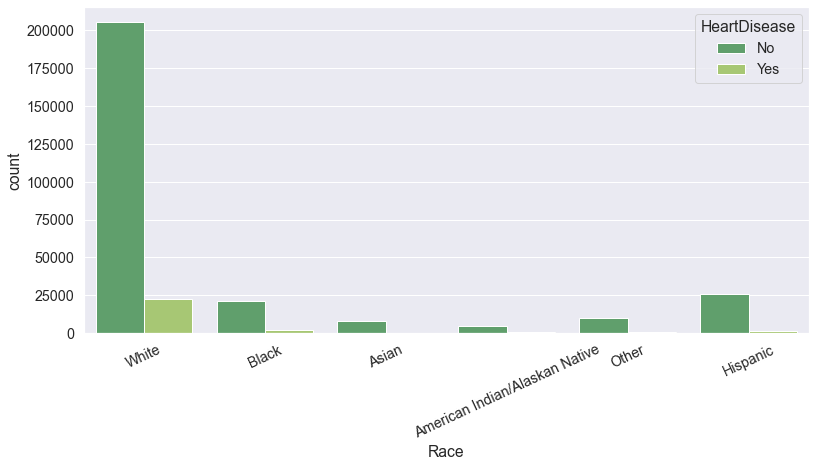

In [56]:
plt.figure(figsize = (13,6))
print(df.groupby('Race')['HeartDisease'].value_counts())
sns.countplot(x = df['Race'], hue = 'HeartDisease', data = df,palette = 'summer')
plt.xticks(rotation= 25)

- **We can see that white people are more susceptible to heart disease.**

   <div style="color:yellow;display:fill;border-radius:8px;
            background-color:#ffcc00;font-size:160%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px
;color:blue;"><b> Diabetic  </b></p>
</div>


No                         251796
Yes                         40589
No, borderline diabetes      6776
Yes (during pregnancy)       2556
Name: Diabetic, dtype: int64


(array([0, 1, 2, 3]),
 [Text(0, 0, 'No'),
  Text(1, 0, 'Yes'),
  Text(2, 0, 'No, borderline diabetes'),
  Text(3, 0, 'Yes (during pregnancy)')])

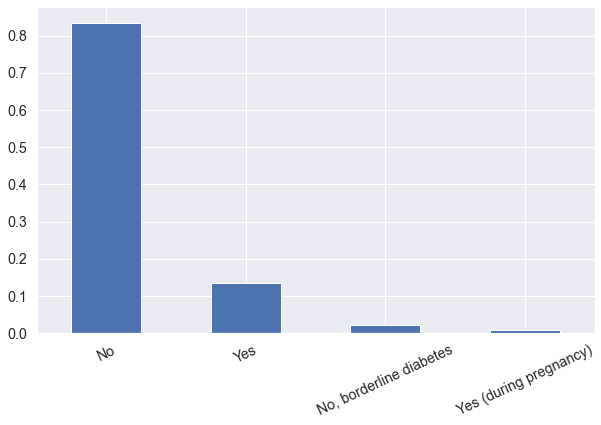

In [120]:
print(df.Diabetic.value_counts())
df.Diabetic.value_counts(normalize=True).plot(kind='bar')
plt.xticks(rotation= 25)

Diabetic                 HeartDisease
No                       No              234380
                         Yes              17416
No, borderline diabetes  No                5987
                         Yes                789
Yes                      No               31641
                         Yes               8948
Yes (during pregnancy)   No                2448
                         Yes                108
Name: HeartDisease, dtype: int64


<AxesSubplot:xlabel='Diabetic', ylabel='count'>

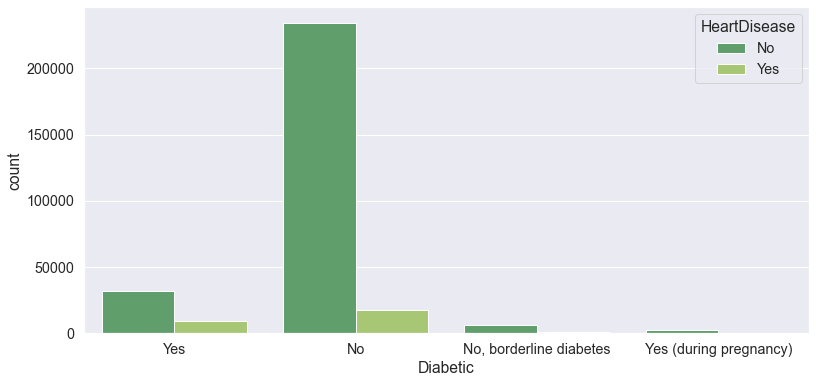

In [121]:
plt.figure(figsize = (13,6))
print(df.groupby('Diabetic')['HeartDisease'].value_counts())
sns.countplot(x = df['Diabetic'], hue = 'HeartDisease', data = df,palette = 'summer')

   <div style="color:yellow;display:fill;border-radius:8px;
            background-color:#ffcc00;font-size:160%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px
;color:blue;"><b> General Helth  </b></p>
</div>


Very good    104796
Good          91239
Excellent     59737
Fair          34659
Poor          11286
Name: GenHealth, dtype: int64


<AxesSubplot:>

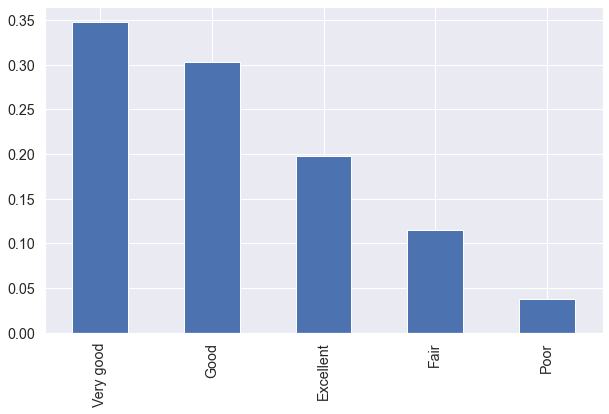

In [57]:
print(df.GenHealth.value_counts())
df.GenHealth.value_counts(normalize=True).plot(kind='bar')

GenHealth  HeartDisease
Excellent  No              58242
           Yes              1495
Fair       No              27576
           Yes              7083
Good       No              81734
           Yes              9505
Poor       No               7436
           Yes              3850
Very good  No              99468
           Yes              5328
Name: HeartDisease, dtype: int64


<AxesSubplot:xlabel='GenHealth', ylabel='count'>

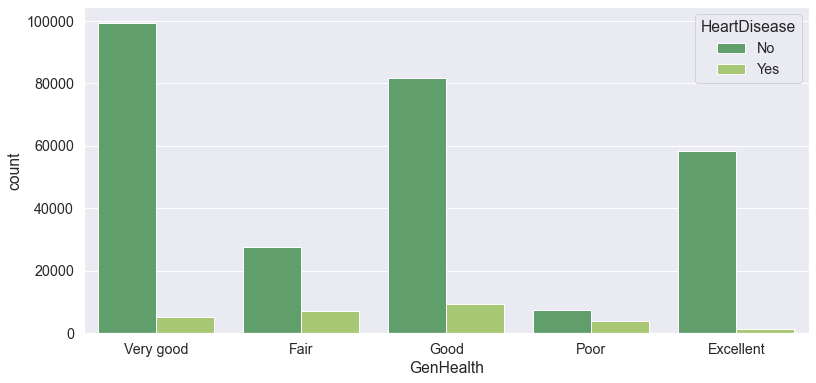

In [123]:
plt.figure(figsize = (13,6))
print(df.groupby('GenHealth')['HeartDisease'].value_counts())
sns.countplot(x = df['GenHealth'], hue = 'HeartDisease', data = df,palette = 'summer')

**people who have good general health are the most heart disease**

# <b>6<span style='color:#0000FF'>|</span> Data Preprocessing</b>

In [59]:
df=read_data('heart_disease.csv')

<div style="color:yellow;display:fill;border-radius:8px;
            background-color:#0000FF;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px
;color:white;"><b> Removing BMI outliers  </b></p>
</div>. 

In [62]:
outliers_indices = detect_outliers(df, 0, ['BMI'])
len(outliers_indices)

10396

In [63]:
df.drop(index = outliers_indices, inplace=True)
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319789,No,22.22,No,No,No,0.0,0.0,No,Female,18-24,Hispanic,No,Yes,Excellent,8.0,No,No,No
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No


<div style="color:yellow;display:fill;border-radius:8px;
            background-color:#0000FF;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px
;color:white;"><b> Encoding  </b></p>
</div>. 

 ###  <span style='color:#0000FF'> **Label Encoding**  </span>

In [64]:
mapping_Genhealth={'Poor': 0, 'Fair': 1, 'Good': 2, 'Very good': 3, 'Excellent': 4}
mapping_AgeCategory ={'18-24': 0, '25-29': 1, '30-34': 2, '35-39': 3, '40-44': 4, '45-49': 5, '50-54': 6,
 '55-59': 7, '60-64': 8, '65-69': 9, '70-74': 10, '75-79': 11, '80 or older': 12}
mapping_yes_no={'Yes':1,'No':0}

In [65]:
df[Yes_No_Columns]=df[Yes_No_Columns].replace(mapping_yes_no)
df['GenHealth']=df['GenHealth'].map(mapping_Genhealth)
df['AgeCategory']=df['AgeCategory'].map(mapping_AgeCategory)
df['HeartDisease']=df['HeartDisease'].map(mapping_yes_no)

In [66]:
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,Female,7,White,Yes,1,3,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,Female,12,White,No,1,3,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,Male,9,White,Yes,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,Female,11,White,No,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,Female,4,White,No,1,3,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319789,0,22.22,0,0,0,0.0,0.0,0,Female,0,Hispanic,No,1,4,8.0,0,0,0
319790,1,27.41,1,0,0,7.0,0.0,1,Male,8,Hispanic,Yes,0,1,6.0,1,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,Male,3,Hispanic,No,1,3,5.0,1,0,0
319792,0,24.24,0,0,0,0.0,0.0,0,Female,5,Hispanic,No,1,2,6.0,0,0,0


 ###  <span style='color:#0000FF'> **OneHot Encoding**  </span>

In [67]:
cols =['Sex','Race', 'Diabetic']
df=pd.get_dummies(df,columns=cols,drop_first=True)

In [68]:
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,AgeCategory,PhysicalActivity,...,SkinCancer,Sex_Male,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy)
0,0,16.60,1,0,0,3.0,30.0,0,7,1,...,1,0,0,0,0,0,1,0,1,0
1,0,20.34,0,0,1,0.0,0.0,0,12,1,...,0,0,0,0,0,0,1,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,9,1,...,0,1,0,0,0,0,1,0,1,0
3,0,24.21,0,0,0,0.0,0.0,0,11,0,...,1,0,0,0,0,0,1,0,0,0
4,0,23.71,0,0,0,28.0,0.0,1,4,1,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319789,0,22.22,0,0,0,0.0,0.0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
319790,1,27.41,1,0,0,7.0,0.0,1,8,0,...,0,1,0,0,1,0,0,0,1,0
319791,0,29.84,1,0,0,0.0,0.0,0,3,1,...,0,1,0,0,1,0,0,0,0,0
319792,0,24.24,0,0,0,0.0,0.0,0,5,1,...,0,0,0,0,1,0,0,0,0,0


# <b>7<span style='color:#0000FF'>|</span> Split Dataset for Training and Testing </b>

In [69]:
features = df.drop(columns =['HeartDisease'], axis = 1)
target = df['HeartDisease']

In [70]:
x_train, x_test, y_train, y_test = train_test_split(features, target, shuffle = True, test_size = .2, random_state = 44)

In [71]:
print('Shape of training feature:', x_train.shape)
print('Shape of testing feature:', x_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of training label:', y_test.shape)

Shape of training feature: (247519, 23)
Shape of testing feature: (61880, 23)
Shape of training label: (247519,)
Shape of training label: (61880,)


# <b>8<span style='color:#0000FF'>|</span> Standrization </b>

In [72]:
Scaler = StandardScaler()
Scaler.fit(x_train)

StandardScaler()

In [73]:
x_train = Scaler.transform(x_train)
x_test = Scaler.transform(x_test)

In [74]:
x_train

array([[-1.18040617, -0.8355609 , -0.2718805 , ..., -0.14537826,
        -0.37178285, -0.08874161],
       [-0.35106531,  1.19680086, -0.2718805 , ..., -0.14537826,
        -0.37178285, -0.08874161],
       [ 0.35733002,  1.19680086, -0.2718805 , ..., -0.14537826,
        -0.37178285, -0.08874161],
       ...,
       [-0.53344351, -0.8355609 , -0.2718805 , ..., -0.14537826,
        -0.37178285, -0.08874161],
       [ 1.40168518, -0.8355609 , -0.2718805 , ..., -0.14537826,
        -0.37178285, -0.08874161],
       [-0.21668137, -0.8355609 , -0.2718805 , ..., -0.14537826,
        -0.37178285, -0.08874161]])

### Correlation 

In [75]:
heart_corr=df.corr()['HeartDisease'][1:-6]
heart_corr

BMI                 0.052623
Smoking             0.108419
AlcoholDrinking    -0.032715
Stroke              0.196820
PhysicalHealth      0.169472
MentalHealth        0.026764
DiffWalking         0.200108
AgeCategory         0.234370
PhysicalActivity   -0.098288
GenHealth          -0.243493
SleepTime           0.008845
Asthma              0.039133
KidneyDisease       0.141923
SkinCancer          0.094581
Sex_Male            0.070536
Race_Asian         -0.030634
Race_Black         -0.010845
Name: HeartDisease, dtype: float64

<AxesSubplot:xlabel='HeartDisease'>

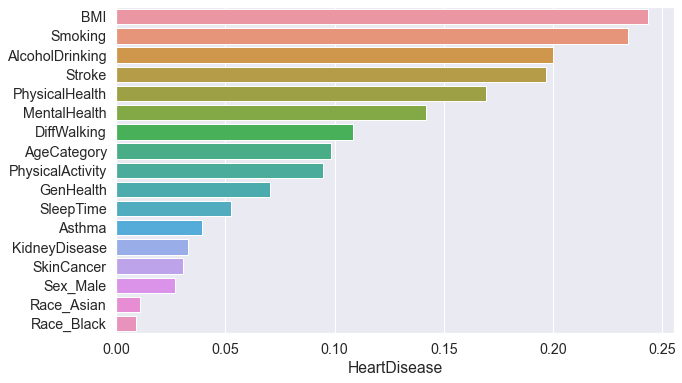

In [76]:
sns.barplot(x=heart_corr.abs().sort_values(ascending=False), y=heart_corr.index)

# <b>9 <span style='color:#0000FF'>|</span> Modeling </b>

**I tried alot of models in a separate sheet.. the best model accurcy is XGboost.**

<div style="color:yellow;display:fill;border-radius:8px;
            background-color:#0000FF;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px
;color:white;"><b> XGBOOST | Cross_Validation   </b></p>
</div>. 

In [77]:
from sklearn.model_selection import cross_validate
model=XGBClassifier()
c_val = cross_validate(model, x_train, y_train, cv = 10 , scoring = ('accuracy', 'recall', 'precision'))

[09:43:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:43:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:44:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:44:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [78]:
c_val

{'fit_time': array([20.8414526 , 20.92918062, 20.63146615, 21.84634638, 21.70624518,
        20.48886251, 21.52060938, 21.15185142, 21.42804265, 22.57837749]),
 'score_time': array([0.07405353, 0.08406138, 0.07505369, 0.074054  , 0.0725522 ,
        0.07705522, 0.09607053, 0.07455325, 0.07305384, 0.07405353]),
 'test_accuracy': array([0.91794602, 0.91794602, 0.91624919, 0.9166936 , 0.91540078,
        0.91479476, 0.91556238, 0.91576438, 0.91778442, 0.91713466]),
 'test_recall': array([0.10354746, 0.10162991, 0.09443912, 0.09535218, 0.10110206,
        0.09008146, 0.09966459, 0.09583134, 0.10301869, 0.09635666]),
 'test_precision': array([0.5729443 , 0.57452575, 0.51706037, 0.53351206, 0.49184149,
        0.47236181, 0.49642005, 0.50251256, 0.56878307, 0.54768392])}

In [79]:
c_val['test_accuracy'].mean() *100

91.65276225543843

In [80]:
c_val['test_recall'].mean() *100

9.81023465814261

**The accurcy of model (91.5%) , it's very good accurcy .. but we see the the recall is very low ..
we show take in care the (FN) values in this case.**

**The f1 score in most of the cases is awful. That means something isn't right. 
To have better results and more accurate model we need to undersample the dataset.
The problem of undersampling is that we cut a lot of data of the original dataset. Also undersampling is okay if we cut max x1.6 of the data entries, here we cut more of the given ratio. But still we are going to get better results.**

<div style="color:yellow;display:fill;border-radius:8px;
            background-color:#0000FF;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px
;color:white;"><b> Undersampling Dataset  </b></p>
</div>. 


In [112]:
df=read_data('heart_disease.csv')

### **1. Encoding** 

In [113]:
mapping_Genhealth={'Poor': 0, 'Fair': 1, 'Good': 2, 'Very good': 3, 'Excellent': 4}
mapping_AgeCategory ={'18-24': 0, '25-29': 1, '30-34': 2, '35-39': 3, '40-44': 4, '45-49': 5, '50-54': 6,
 '55-59': 7, '60-64': 8, '65-69': 9, '70-74': 10, '75-79': 11, '80 or older': 12}
mapping_yes_no={'Yes':1,'No':0}

In [114]:
df[Yes_No_Columns]=df[Yes_No_Columns].replace(mapping_yes_no)
df['GenHealth']=df['GenHealth'].map(mapping_Genhealth)
df['AgeCategory']=df['AgeCategory'].map(mapping_AgeCategory)
df['HeartDisease']=df['HeartDisease'].map(mapping_yes_no)

In [115]:
cols =['Sex','Race', 'Diabetic']
df=pd.get_dummies(df,columns=cols,drop_first=True)

### **2. Undersampling**

In [116]:
majority = len(df[df['HeartDisease'] == 0])
minority = len(df[df['HeartDisease'] == 1])
print('Majority class: ', majority)
print('Minority class: ', minority)

Majority class:  292422
Minority class:  27373


In [117]:
random_majority = np.random.choice(majority, minority, replace=False)
print('The length of the random majority class: ', len(random_majority))

The length of the random majority class:  27373


In [118]:
minority_idx = df[df['HeartDisease'] == 1].index
print(minority_idx)

Int64Index([     5,     10,     35,     42,     43,     45,     77,     78,
               101,    127,
            ...
            319708, 319721, 319739, 319758, 319761, 319765, 319767, 319781,
            319786, 319790],
           dtype='int64', length=27373)


In [119]:
undersample = np.concatenate([minority_idx, random_majority])
undersample_df = df.loc[undersample]
undersample_df.shape

(54746, 24)

<BarContainer object of 2 artists>

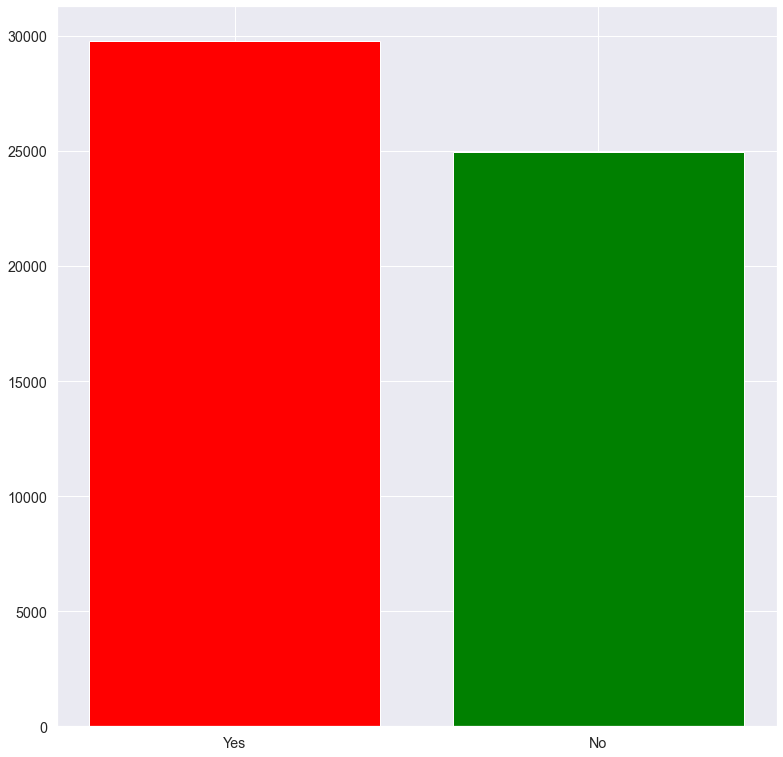

In [100]:
fig = plt.figure(figsize=(10, 10))
fig.add_axes([1.0, 1.0, 1.0, 1.0])
plt.bar(['Yes', 'No'], undersample_df.HeartDisease.value_counts(), color=['red', 'green'])

### **3. Train test split**

In [120]:
features = undersample_df.drop(columns =['HeartDisease'], axis = 1)
target = undersample_df['HeartDisease']

In [130]:
x_train, x_test, y_train, y_test = train_test_split(features, target, shuffle = True, test_size = .1, random_state = 44)

In [131]:
print('Shape of training feature:', x_train.shape)
print('Shape of testing feature:', x_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of training label:', y_test.shape)

Shape of training feature: (49271, 23)
Shape of testing feature: (5475, 23)
Shape of training label: (49271,)
Shape of training label: (5475,)


### **4. Standrization**

In [132]:
Scaler = StandardScaler()
Scaler.fit(x_train)
x_train = Scaler.transform(x_train)
x_test = Scaler.transform(x_test)

In [133]:
x_train

array([[ 0.0694565 , -0.99981735, -0.24275706, ..., -0.16054266,
        -0.54069779, -0.0809797 ],
       [-0.21443211, -0.99981735, -0.24275706, ..., -0.16054266,
        -0.54069779, -0.0809797 ],
       [-0.47376819,  1.00018268, -0.24275706, ..., -0.16054266,
        -0.54069779, -0.0809797 ],
       ...,
       [-0.17913785, -0.99981735, -0.24275706, ..., -0.16054266,
        -0.54069779, -0.0809797 ],
       [-0.17913785, -0.99981735, -0.24275706, ..., -0.16054266,
        -0.54069779, -0.0809797 ],
       [-0.57504737, -0.99981735, -0.24275706, ..., -0.16054266,
        -0.54069779, -0.0809797 ]])

### **5. Modeling**

**I tried alot of models in a separate sheet.. the best model accurcy is Support Vector Machine.**

<div style="color:yellow;display:fill;border-radius:8px;
            background-color:#ffcc00;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px
;color:black;"><b>  Support Vector Machine  </b></p>
</div>. 

In [136]:
model=SVC()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

Training Accuracy: 0.7829757869740821
__________________________________________________
Accuracy Score:  0.771324200913242
__________________________________________________
Precision Score:  0.7543231961836613
__________________________________________________
Recall Score:  0.8553076402974983
__________________________________________________
              precision    recall  f1-score   support

           0       0.80      0.67      0.73      2517
           1       0.75      0.86      0.80      2958

    accuracy                           0.77      5475
   macro avg       0.78      0.76      0.77      5475
weighted avg       0.77      0.77      0.77      5475

__________________________________________________
F1 Score:  0.8016476552598225


Text(26.5, 0.5, 'True')

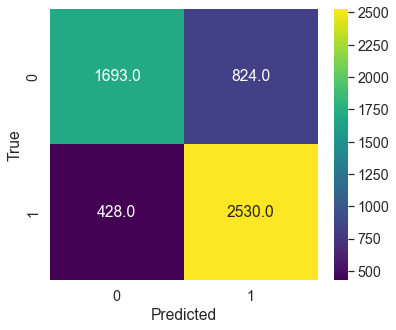

In [137]:
print(f'Training Accuracy: {model.score(x_train, y_train)}')
print('_'*50)
print('Accuracy Score: ', accuracy_score(y_test, y_pred))
print('_'*50)
print('Precision Score: ', precision_score(y_test, y_pred))
print('_'*50)
print('Recall Score: ', recall_score(y_test, y_pred))
print('_'*50)
print(classification_report(y_test,y_pred))
print('_'*50)
print('F1 Score: ',f1_score(y_test,y_pred))
    
# Display confussion matrix
plt.figure(figsize = (6,5))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True,cmap='viridis', fmt = '.1f') # plot_kwargs = {'percent' : True}
plt.xlabel('Predicted')
plt.ylabel('True')

# <b>10 <span style='color:#0000FF'>|</span> Deployment of model </b>

In [139]:
joblib.dump(model, 'model.h5')

['model.h5']

In [140]:
joblib.dump(Scaler, 'scaler.h5')

['scaler.h5']

<div style="color:yellow;display:fill;border-radius:8px;
            background-color:#0000FF;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px
;color:white;"><b> Conclusion 
</div>. 

- **Most people in this dataset are reported to not have had a heart condition (coronary heart disease (CHD) or myocardial infarction (MI) in specific)**
- **The percentage of heart disease is nearly equal between Male and Female.** 
- **7% of people who sleep less than 8 hours have heart disease** 
- **8.5% of people who sleep more than 12 hours have heart disease**
- **For both Physical Health and Mental health, we can see a heavy right skew. It also seems that most people answered '0 days' for both, which sounds like they are 'normal'. But compared to other answers like '8 days' or '15 days', many people (in comparison to other answers within the 1-30 range) answered '30 days', which basically sounds like they don't feel good every day.**
- **People who have zero value of physical health are the most heart disease, come next people who have 30 days good physicalhealth**   
- **Most cases of heart disease are men.**
- **Most cases that got no heart disease are women**
- **We can see that people who are 80 or older are more likely to get HeartDiseases.**
- **We can see that white people are more susceptible to heart disease.**
- **people who have good general health are the most heart disease**

 **The accurcy of model (91.5%) , it's very good accurcy .. but we see the the recall is very low ..
we show take in care the (FN) values in this case.**

**The f1 score in most of the cases is awful. That means something isn't right. 
To have better results and more accurate model we need to undersample the dataset.
The problem of undersampling is that we cut a lot of data of the original dataset. Also undersampling is okay if we cut max x1.6 of the data entries, here we cut more of the given ratio. But still we are going to get better results.**